In [1]:
import pandas as pd
diabetes = pd.read_csv('diabetes.csv')
diabetes

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
...,...,...,...,...,...,...,...,...,...,...
14995,1490300,10,65,60,46,177,33.512468,0.148327,41,1
14996,1744410,2,73,66,27,168,30.132636,0.862252,38,1
14997,1742742,0,93,89,43,57,18.690683,0.427049,24,0
14998,1099353,0,132,98,18,161,19.791645,0.302257,23,0


In [2]:
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
target = 'Diabetic'
X, y = diabetes[features], diabetes[target]
print('X:')
display(X)
print('\ny:')
display(y)

X:


,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
0,0,171,80,34,23,43.509726,1.213191,21
1,8,92,93,47,36,21.240576,0.158365,23
2,7,115,47,52,35,41.511523,0.079019,23
3,9,103,78,25,304,29.582192,1.282870,43
4,1,85,59,27,35,42.604536,0.549542,22
...,...,...,...,...,...,...,...,...
14995,10,65,60,46,177,33.512468,0.148327,41
14996,2,73,66,27,168,30.132636,0.862252,38
14997,0,93,89,43,57,18.690683,0.427049,24
14998,0,132,98,18,161,19.791645,0.302257,23



y:


0        0
1        0
2        0
3        1
4        0
        ..
14995    1
14996    1
14997    0
14998    0
14999    1
Name: Diabetic, Length: 15000, dtype: int64

In [3]:
pd.Series(y).value_counts(normalize=True)

Diabetic
0    0.666667
1    0.333333
Name: proportion, dtype: float64

In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [5]:
X.describe()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733
std,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000
25%,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000
50%,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000
75%,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000
max,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000


Unique values: 15
Unique values: 149
Unique values: 90
Unique values: 69
Unique values: 663
Unique values: 15000
Unique values: 14999
Unique values: 56


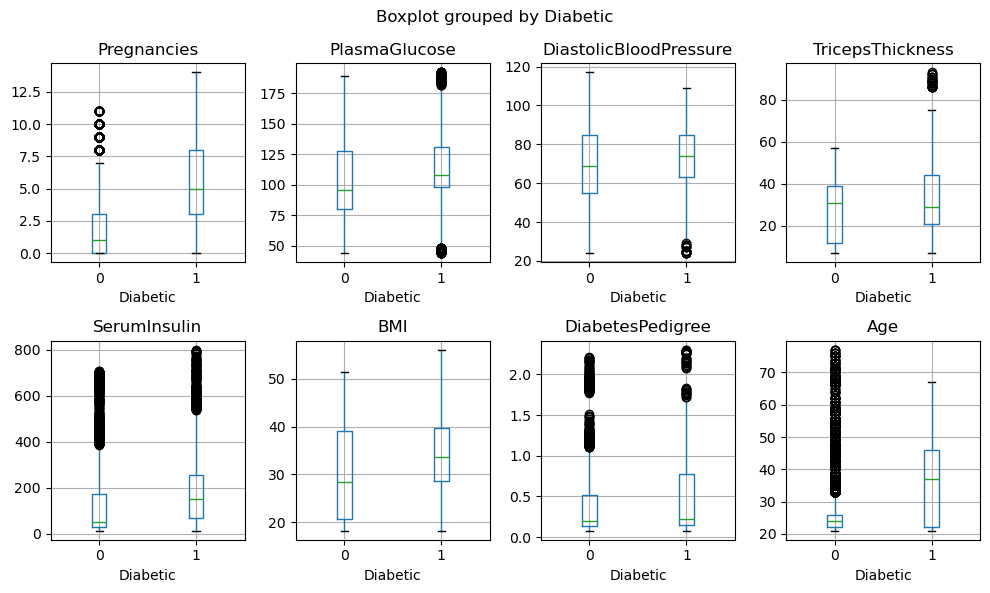

In [19]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 4, figsize=(10, 6))
axes = axes.flatten()

i = 0
for col in features:
    print(f'Unique values: {len(diabetes[col].unique())}')
    diabetes.boxplot(column=col, by='Diabetic', ax=axes[i])
    axes[i].set_title(col)
    i += 1
plt.tight_layout()
plt.show()

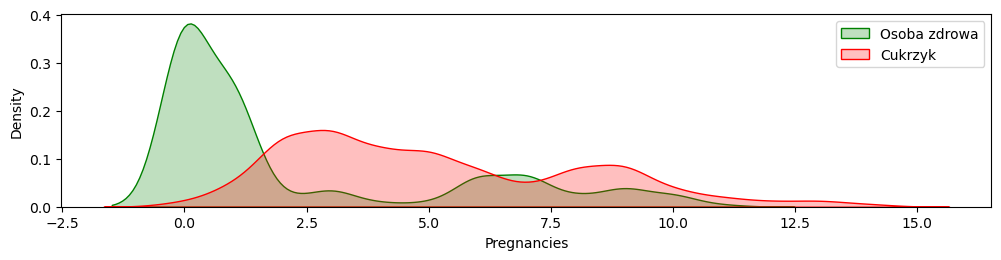

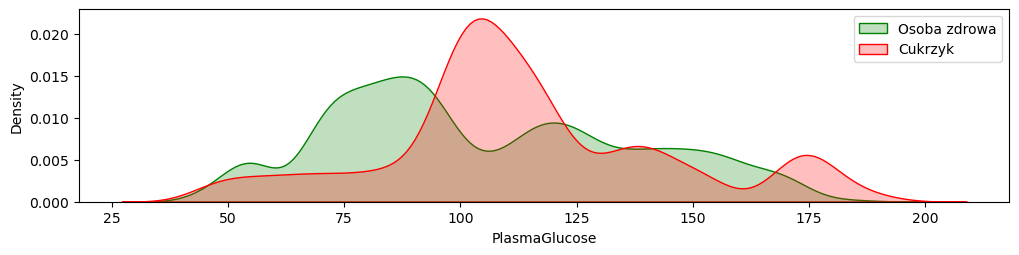

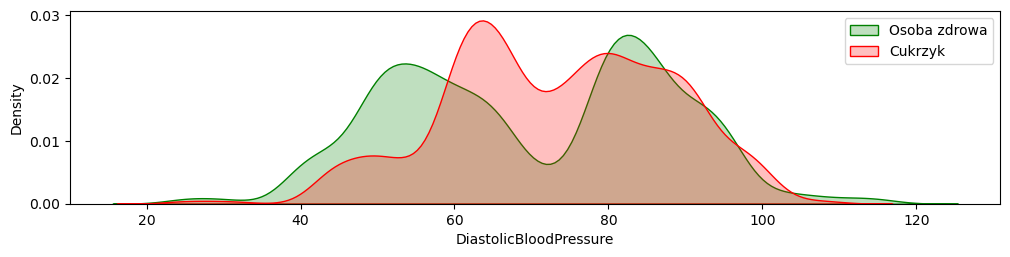

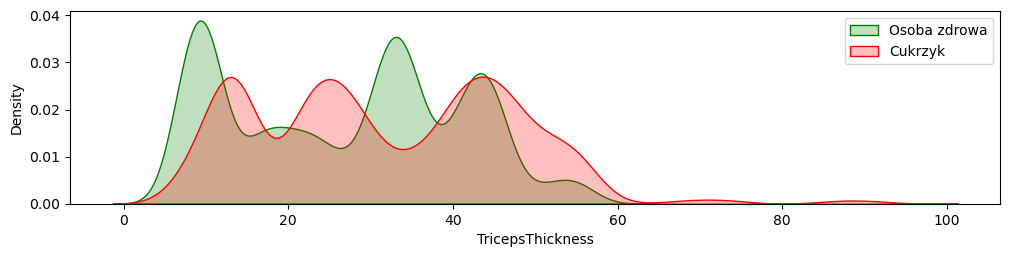

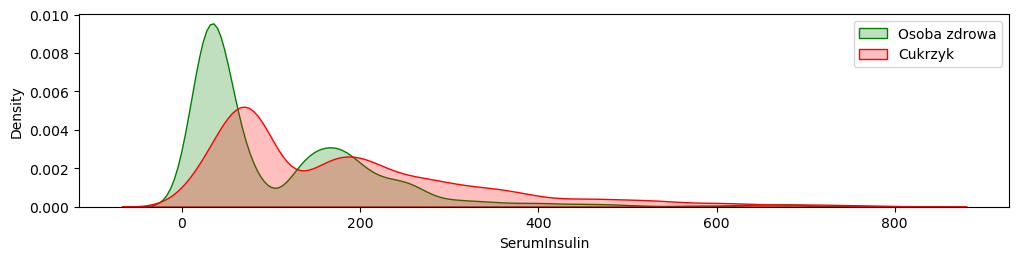

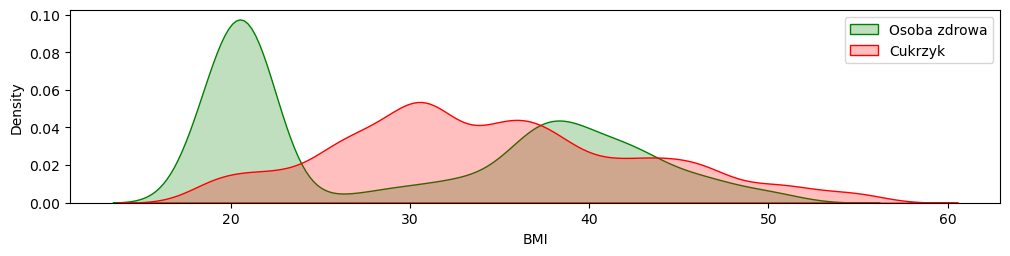

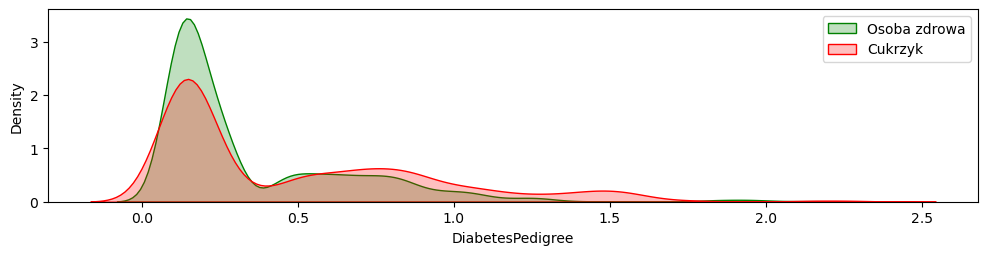

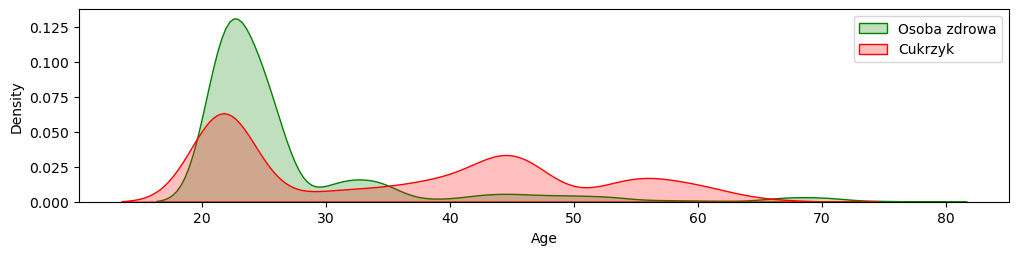

In [7]:
import seaborn as sns
for col in features:
    plt.figure(figsize=(12, 2.5))
    sns.kdeplot(data=diabetes.loc[diabetes['Diabetic'] == 0, col],
            label='Osoba zdrowa', color='green', fill=True)
    # sns.distplot(diabetes.loc[diabetes['Diabetic']==0, col], kde=True, color='green', label='Osoba zdrowa')
    sns.kdeplot(data=diabetes.loc[diabetes['Diabetic']==1, col], fill=True, color='red', label='Cukrzyk')
    plt.legend(loc='upper right')
    plt.show()

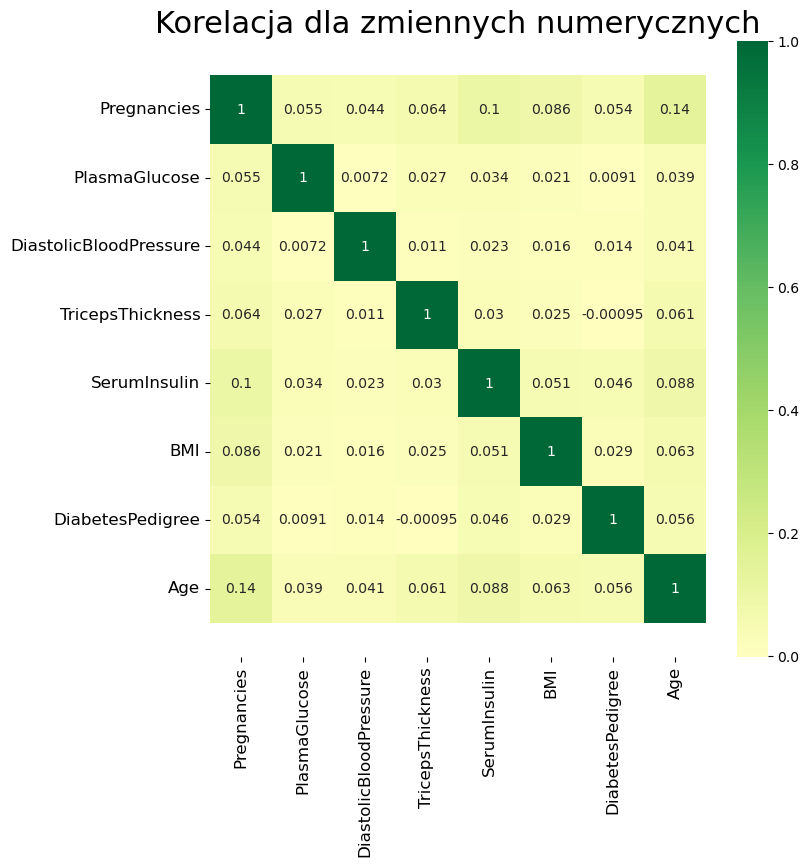

In [8]:
plt.figure(figsize=(8, 8))
ax = sns.heatmap(X.corr(),
                 xticklabels=X.corr().columns,
                 yticklabels=X.corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True)

plt.title('Korelacja dla zmiennych numerycznych', fontsize=22)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [9]:
from scipy import stats

corr_dict = {}
for col in features:
    corr_dict[col] = stats.pointbiserialr(X[col], y)[0]
pd.Series(corr_dict).sort_values(ascending=False)

Pregnancies               0.407315
Age                       0.342605
SerumInsulin              0.247375
BMI                       0.210508
DiabetesPedigree          0.170302
TricepsThickness          0.152505
PlasmaGlucose             0.128004
DiastolicBloodPressure    0.091307
dtype: float64

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[['Pregnancies', 'Age']], y, test_size=0.30, random_state=0, stratify=y)
print ('Treningowe obserwacje: %d\nTestowe obserwacje: %d' % (X_train.shape[0], X_test.shape[0]))

Treningowe obserwacje: 10500
Testowe obserwacje: 4500


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)
model_lr = LogisticRegression()
model_lr.fit(X_train_standardized, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [12]:
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack

def plot_classification_surface(X_plot, y_plot, trained_model, title, ax):

    # określenie granic zbioru
    min1, max1 = X_plot[:, 0].min()-1, X_plot[:, 0].max()+1
    min2, max2 = X_plot[:, 1].min()-1, X_plot[:, 1].max()+1

    # skalowanie dla obu osi
    x1grid = arange(min1, max1, 0.1)
    x2grid = arange(min2, max2, 0.1)

    # utworzenie siatki
    xx, yy = meshgrid(x1grid, x2grid)

    # przetworzenie siatki w wektor
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    # stworzenie zmiennych objaśniających dla modelu
    grid = hstack((r1,r2))

    # predykcja modelu zbioru
    yhat = trained_model.predict(grid)

    # przetworzenie predykcji na decyzji dla konkretnego punktu wykresu
    zz = yhat.reshape(xx.shape)

    # wizualizacja siatki z przyporządkowaną klasą
    ax.contourf(xx, yy, zz, cmap='Paired')

    # tworzenie wykresu punktowego dla klas ze zbioru X
    for class_value in range(2):

        # przyporządkowanie klasy (y) do obsewacji (X)
        row_ix = where(y_plot == class_value)

        # stworzenie wykresu punktowego
        ax.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], alpha=0.3, label=class_value)

    # wizualizacja wykresu
    ax.legend(loc='upper right')
    ax.set_title(title)


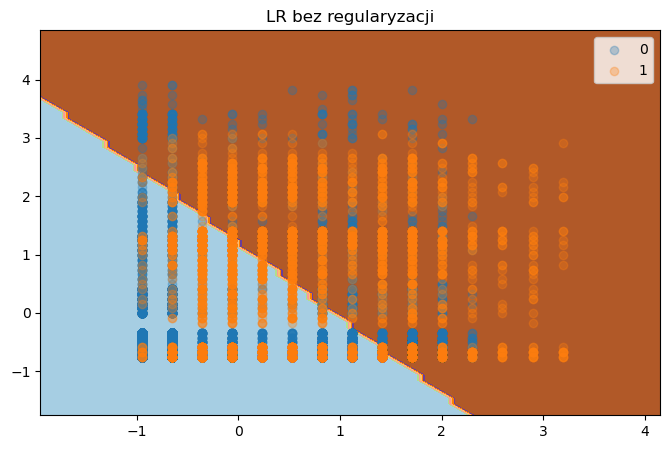

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
plot_classification_surface(X_train_standardized, y_train, model_lr, 'LR bez regularyzacji', ax)
plt.show()

In [14]:
from sklearn.metrics import f1_score, accuracy_score
import math

def main(print_classification_surface):

    c_values = [0.01, 0.1, 1, 10]
    l1_ratios = [0.1, 0.5, 0.9]

    results = []

    if (print_classification_surface):
        number_of_subplots = 12
        number_of_columns = 3
        number_of_rows = math.ceil(number_of_subplots / number_of_columns)
        fig, axes = plt.subplots(number_of_rows, number_of_columns, figsize=(10, 8))
        axes = axes.flatten()
    i = 0
    for c in c_values:
        for l1_ratio in l1_ratios:
            model = LogisticRegression(penalty='elasticnet', solver='saga',
                                    l1_ratio=l1_ratio, C=c, max_iter=10000)
            model.fit(X_train_standardized, y_train)
            f1_score_train = f1_score(y_train, model.predict(X_train_standardized))
            y_pred = model.predict(X_test_standardized)
            accuracy = accuracy_score(y_test, y_pred)
            f1_score_test = f1_score(y_test, y_pred)
            results.append({'C': c, 'l1_ratio': l1_ratio, 'accuracy': accuracy, 'f1_score_train' : f1_score_train, 'f1_score_test' : f1_score_test})
            if (print_classification_surface):
                plot_classification_surface(X_train_standardized, y_train, model, f'c: {c}, l1_ratio: {l1_ratio}', axes[i])
                i += 1
                
    df_results = pd.DataFrame(results)
    print(df_results)
    if (print_classification_surface):
        plt.tight_layout()
        plt.show()

        C  l1_ratio  accuracy  f1_score_train  f1_score_test
0    0.01       0.1  0.741556        0.536755       0.567497
1    0.01       0.5  0.741556        0.536779       0.567175
2    0.01       0.9  0.741556        0.535323       0.567175
3    0.10       0.1  0.743556        0.546404       0.577289
4    0.10       0.5  0.743556        0.546404       0.577289
5    0.10       0.9  0.743556        0.546404       0.577289
6    1.00       0.1  0.745111        0.546878       0.580928
7    1.00       0.5  0.745111        0.546878       0.580928
8    1.00       0.9  0.745111        0.546878       0.580928
9   10.00       0.1  0.745111        0.546878       0.580928
10  10.00       0.5  0.745111        0.546878       0.580928
11  10.00       0.9  0.745111        0.546878       0.580928


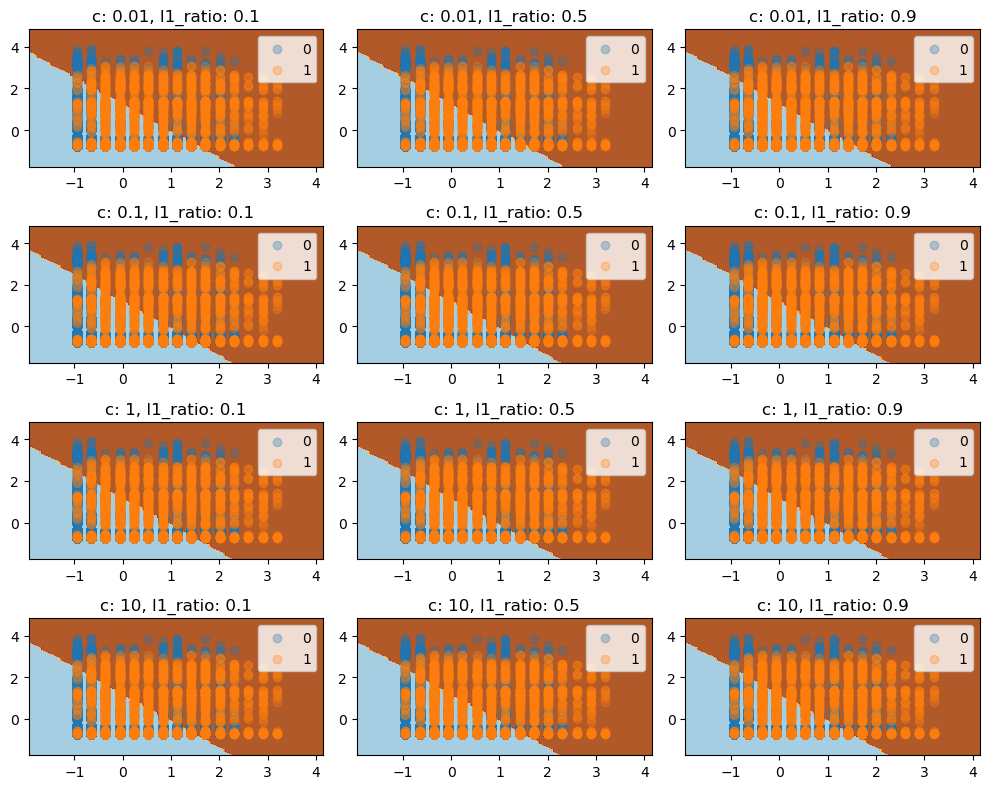

In [15]:
main(True)

Widać niewielkie różnice w wynikach przy różnych stopniach regularyzacji. Dokładność oraz f1_score również nie osiągają dobrych wyników, jednak są lepsze na zbiorach testowych niż treningowych, co oznacza, że modele się nie przeuczają i pod tym względem działają prawidłowo.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0, stratify=y)
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)

In [17]:
main(False)

        C  l1_ratio  accuracy  f1_score_train  f1_score_test
0    0.01       0.1  0.788667        0.644602       0.653804
1    0.01       0.5  0.787333        0.644153       0.650347
2    0.01       0.9  0.786222        0.640419       0.647361
3    0.10       0.1  0.791778        0.649229       0.664518
4    0.10       0.5  0.790889        0.649642       0.662603
5    0.10       0.9  0.790889        0.649541       0.662603
6    1.00       0.1  0.791333        0.649448       0.664283
7    1.00       0.5  0.791333        0.649448       0.664283
8    1.00       0.9  0.791333        0.649868       0.664283
9   10.00       0.1  0.791333        0.649868       0.664283
10  10.00       0.5  0.791333        0.649868       0.664283
11  10.00       0.9  0.791333        0.649868       0.664283


Biorąc pod uwagę wszystkie parametry, nie tylko wiek i ciążę, otrzymano lepsze wyniki. Tak samo jak poprzednio różne stopnie regularyzacji mają niewielki wpływ na ostateczne wyniki. Model nie jest przeuczony (nieco lepsze wyniki na zbiorze testowym).